In [27]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
train = pd.read_csv("/home/eidolon/Documents/ML_PROJECTS/titanic-survival-predictor/data/raw/titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

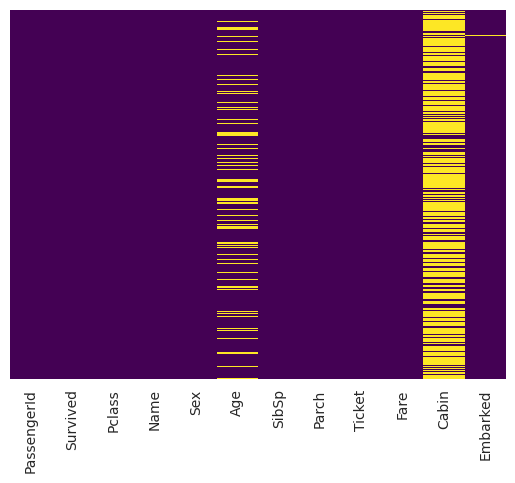

In [30]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [31]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

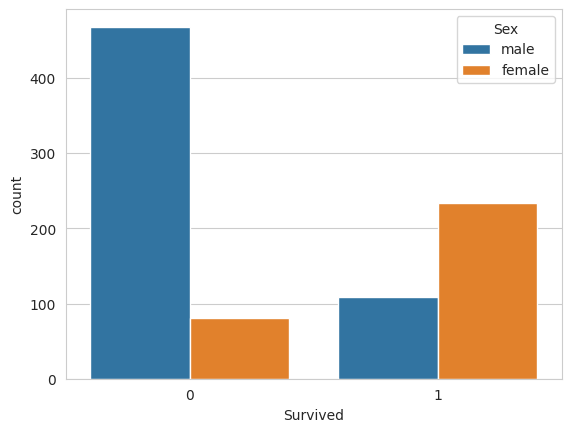

In [32]:
sns.countplot(x='Survived', hue='Sex', data=train)

In [33]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

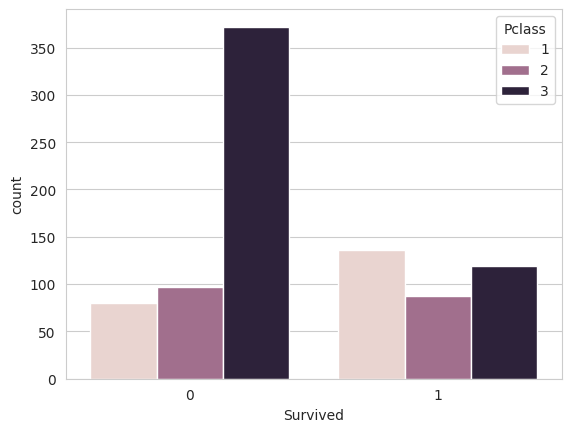

In [34]:
sns.countplot(x='Survived', hue='Pclass', data=train)

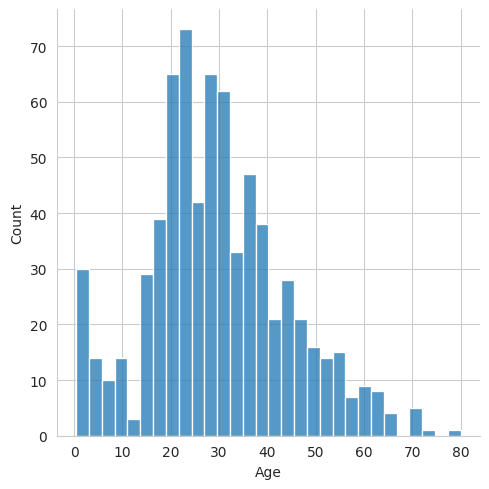

In [35]:
sns.displot(train['Age'].dropna(), kde=False, bins=30)

<Axes: ylabel='Frequency'>

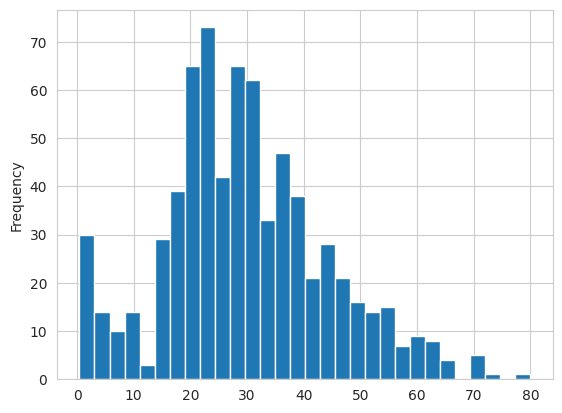

In [36]:
train['Age'].plot.hist(bins=30)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

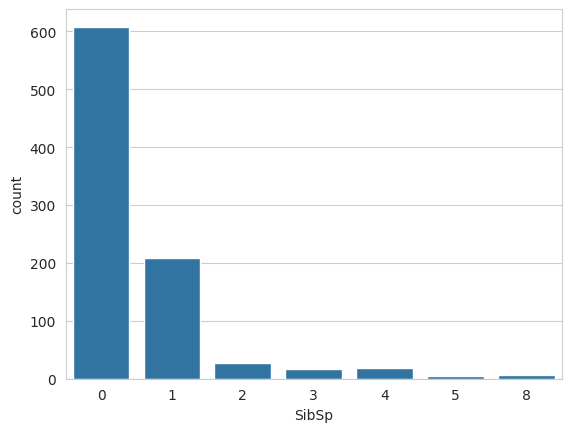

In [38]:
sns.countplot(x='SibSp', data=train)

<Axes: >

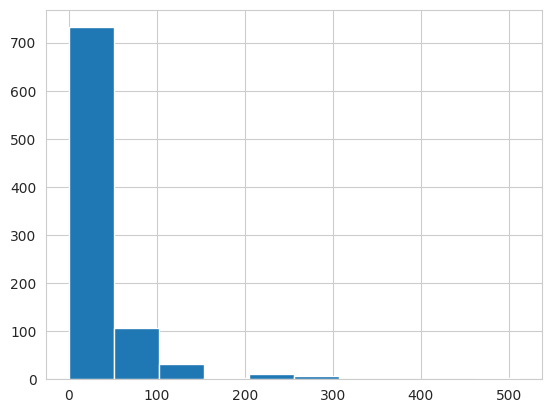

In [39]:
train['Fare'].hist()

In [40]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

In [41]:
train ['Age']  = train[['Age', 'Pclass']].apply(impute_age, axis=1)

/tmp/ipykernel_33657/950975646.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_33657/950975646.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

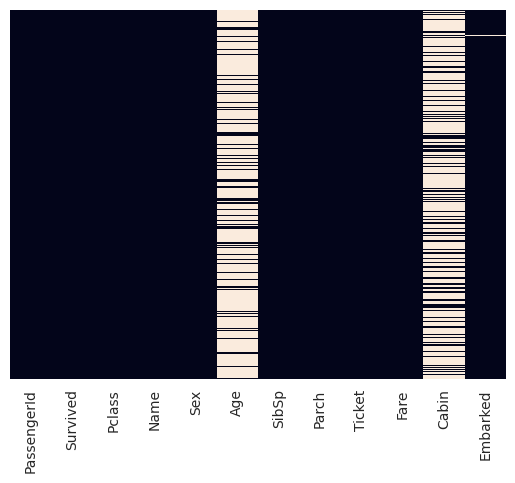

In [42]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [43]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [44]:
train.dropna(inplace=True)

In [45]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [46]:
sex.head()

,male
5,True
17,True
19,False
26,True
28,False


In [47]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [48]:
embark.head()

,Q,S
5,True,False
17,False,True
19,False,False
26,False,False
28,True,False


In [49]:
train = pd.concat([train, sex, embark], axis=1)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,True,True,False
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,True,False,True
19,20,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,C,False,False,False
26,27,0,3,"Emir, Mr. Farred Chehab",male,24.0,0,0,2631,7.2250,C,True,False,False
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,24.0,0,0,330959,7.8792,Q,False,True,False


In [51]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,0,3,24.0,0,0,8.4583,True,True,False
17,1,2,29.0,0,0,13.0000,True,False,True
19,1,3,24.0,0,0,7.2250,False,False,False
26,0,3,24.0,0,0,7.2250,True,False,False
28,1,3,24.0,0,0,7.8792,False,True,False
